In [5]:
import warnings
warnings.filterwarnings("ignore")

import os
import pickle as pkl
import pandas as pd
import numpy as np
import random
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from de_ml_functions import prep_data, custom_train_test_split, train_models
import matplotlib.pyplot as plt
import seaborn as sns

# Re-run this block to see the distributions change

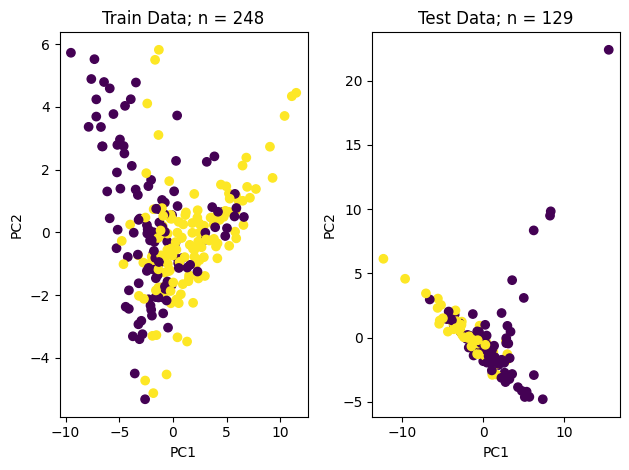

In [6]:
ml_df, donor_ids, samples = prep_data()
X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)

# Sheck the shape of the resulting data
X_train.shape, X_test.shape

### Example Split
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state = 42)

# Plot for Train Data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
X_train_pca = pca.fit_transform(X_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Train Data; n = {X_train.shape[0]}')

# Plot for Test Data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
X_test_pca = pca.fit_transform(X_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, label=y_test)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Test Data; n = {X_test.shape[0]}')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# Run this block to train the model on shuffled data (by donor id)

In [32]:
train_scores = []
test_scores = []
for i in range(1001):
    X_train, y_train, X_test, y_test = custom_train_test_split(ml_df,donor_ids, samples)
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train, y_train)

    preds = clf.predict(X_train)
    f1_score_train = f1_score(y_train,preds)
    train_scores.append(np.round(f1_score_train,4))

    preds = clf.predict(X_test)
    f1_score_test = f1_score(y_test,preds)
    test_scores.append(np.round(f1_score_test,4))

print('Training Logsitic Regession on Shuffled Donor IDs...')
print(f"After {i} iterations:")

print('First 3 scores...')
print('Train Scores (F1): ', train_scores[1:4])
print('Test Scores (F1): ', test_scores[1:4])

print('mean Train: ', np.round(np.mean(train_scores),4))
print('mean Test: ',np.round(np.mean(test_scores),4))

print('Training std : ', np.round(np.std(train_scores),4))
print('Testing std : ', np.round(np.std(test_scores),4))


Training Logsitic Regession on Shuffled Donor IDs...
After 1000 iterations:
First 3 scores...
Train Scores (F1):  [0.7511, 0.8054, 0.8612]
Test Scores (F1):  [0.8321, 0.7286, 0.4783]
mean Train:  0.816
mean Test:  0.6842
Training std :  0.0286
Testing std :  0.0602
